In [1]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
from vqvae import VQVAE

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 200
batch_size = 32


model = VQVAE().to(device)
data = np.random.random((1000, 14))
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
criterion = torch.nn.MSELoss()

In [3]:
losses = {"loss":[], "reconstruction_loss":[], "quant_loss":[], "perplexity":[]}
total_loss = 0
for epoch in range(epochs):
    for i in range(0, data.shape[0], batch_size):
        batch = torch.Tensor(data[i:i+batch_size,:]).to(model.device)
        optimizer.zero_grad()
        out, quant_loss, perplexity, _, _ = model(batch)
        reconstruction_loss = criterion(out, batch)
        loss = reconstruction_loss + quant_loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        losses["loss"].append(loss.item())
        losses["reconstruction_loss"].append(reconstruction_loss.item())
        losses["quant_loss"].append(quant_loss.item())
        losses["perplexity"].append(perplexity.item())

        # print(f'{epoch=}, {loss.item()=}, {quant_loss.item()=}, {reconstruction_loss.item()=}')
    avg_loss = total_loss / 1000
    print(f'{epoch=} {avg_loss}')
    if (epoch + 1) % 5 == 0:
            model.print_codebook_utilization()
            visualize_results(model, batch, out, epoch + 1)

epoch=0, loss.item()=0.6514488458633423, quant_loss.item()=0.10359996557235718, reconstruction_loss.item()=0.5478488802909851
epoch=0, loss.item()=0.571779727935791, quant_loss.item()=0.10187394917011261, reconstruction_loss.item()=0.4699057936668396
epoch=0, loss.item()=0.5429010391235352, quant_loss.item()=0.09925532341003418, reconstruction_loss.item()=0.443645715713501
epoch=0, loss.item()=0.470054030418396, quant_loss.item()=0.10163815319538116, reconstruction_loss.item()=0.368415892124176
epoch=0, loss.item()=0.41705024242401123, quant_loss.item()=0.09927280247211456, reconstruction_loss.item()=0.31777745485305786
epoch=0, loss.item()=0.40992313623428345, quant_loss.item()=0.10943658649921417, reconstruction_loss.item()=0.30048656463623047
epoch=0, loss.item()=0.36088645458221436, quant_loss.item()=0.10484863817691803, reconstruction_loss.item()=0.2560378313064575
epoch=0, loss.item()=0.343459814786911, quant_loss.item()=0.10454847663640976, reconstruction_loss.item()=0.238911330

<BarContainer object of 256 artists>

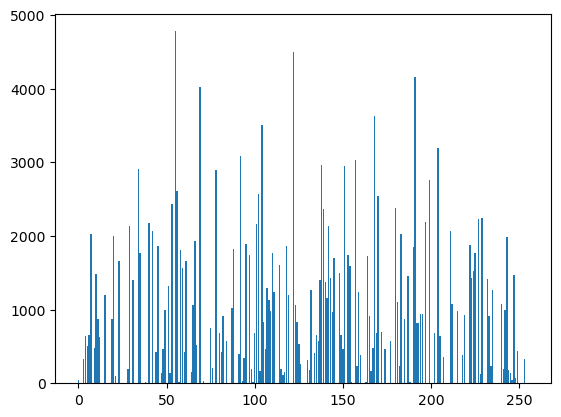

In [6]:
plt.bar(code_book_usage.keys(), code_book_usage.values())

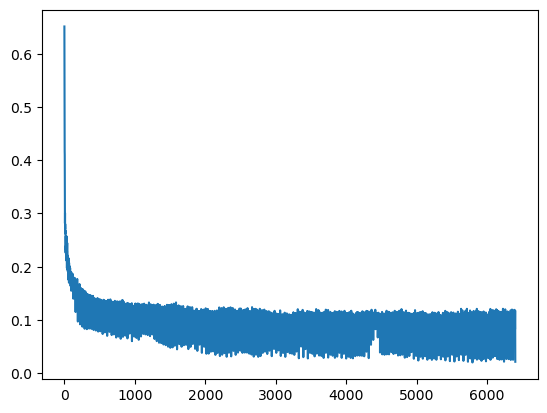

In [8]:
plt.plot(losses['loss'])


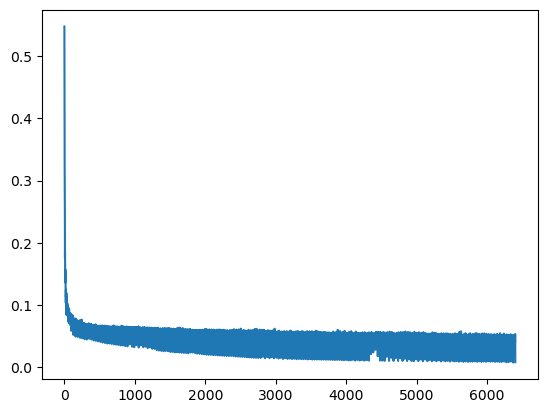

In [9]:
plt.plot(losses['reconstruction_loss'])


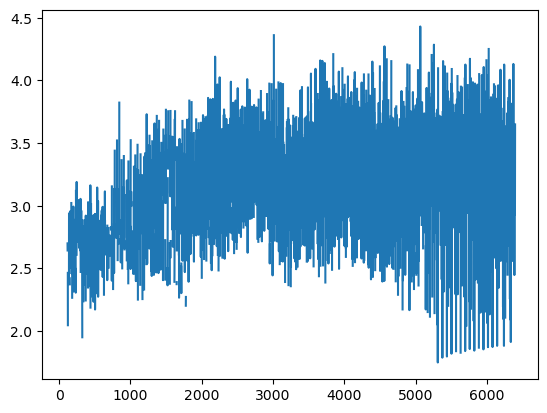

In [10]:
plt.plot(losses['perplexity'])

In [6]:
for epoch in range(epochs):
    for i in range(0, data.shape[0]+ batch_size, batch_size):
        batch = torch.Tensor(data[i:i+batch_size,:]).to(model.device)
        optimizer.zero_grad()
        out, quant_loss = model(batch)
        reconstruction_loss = criterion(out, batch)
        loss = reconstruction_loss + quant_loss
        loss.backward()
        optimizer.step()
        print(f'{epoch=}, {loss.item()=}, {quant_loss.item()=}, {reconstruction_loss.item()=}')

tensor([222, 154,   4, 191, 218,  74,  94, 224,  22,  74,   1, 224, 118, 154,
        179, 155, 198, 179,  43, 213,  82, 231,   1, 117, 155,  89,   6, 179,
         42, 210, 191, 126], device='cuda:0')
epoch=0, loss.item()=0.11282932758331299, quant_loss.item()=0.05459926277399063, reconstruction_loss.item()=0.05823006108403206
tensor([143, 154,  61,   0, 129, 134, 214, 136,  71,  22, 183,  22, 183,  37,
        131,  42, 214, 169, 238, 118,  22, 137, 221, 144,  85, 118,  96,  13,
        177, 160, 251, 180], device='cuda:0')
epoch=0, loss.item()=0.11218768358230591, quant_loss.item()=0.05720493197441101, reconstruction_loss.item()=0.054982755333185196
tensor([183, 191, 218,  43, 104, 239,  82,  96, 106, 182, 244, 183,  22, 251,
        224,  89,  53, 207, 224, 195, 183, 245,  60, 134, 182,  59,   1, 131,
        134, 216, 118,  22], device='cuda:0')
epoch=0, loss.item()=0.1162956953048706, quant_loss.item()=0.05704399570822716, reconstruction_loss.item()=0.05925169959664345
tensor([15